<a href="https://colab.research.google.com/github/rohankalbag/EE325-Assignment-Repo/blob/main/Assignment%204/Q3_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

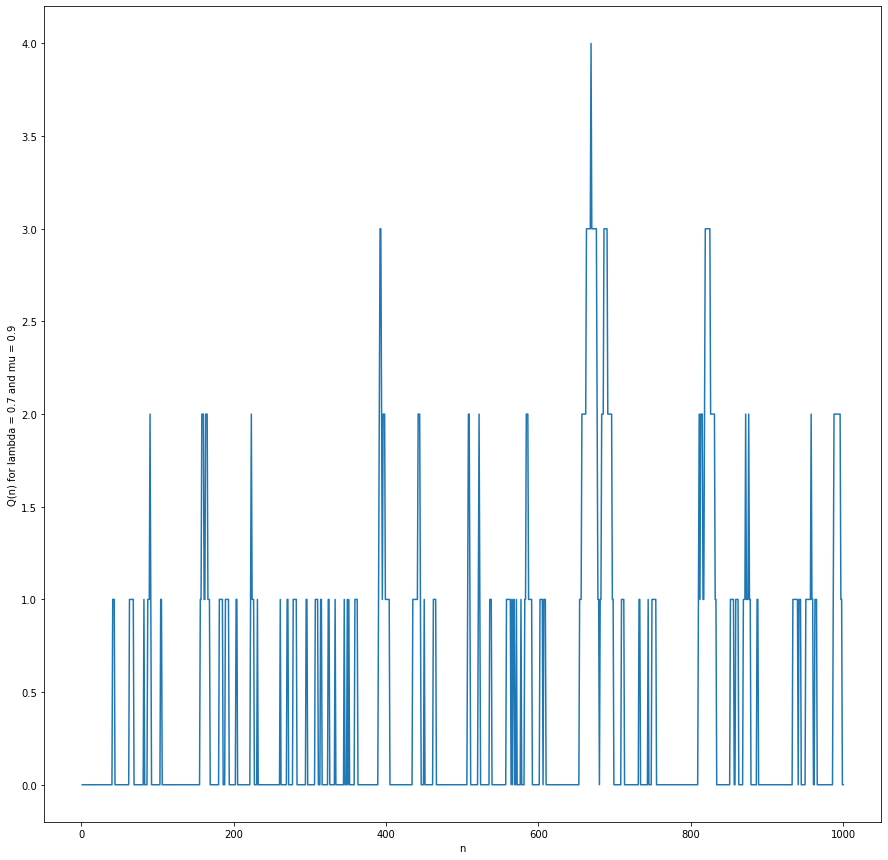

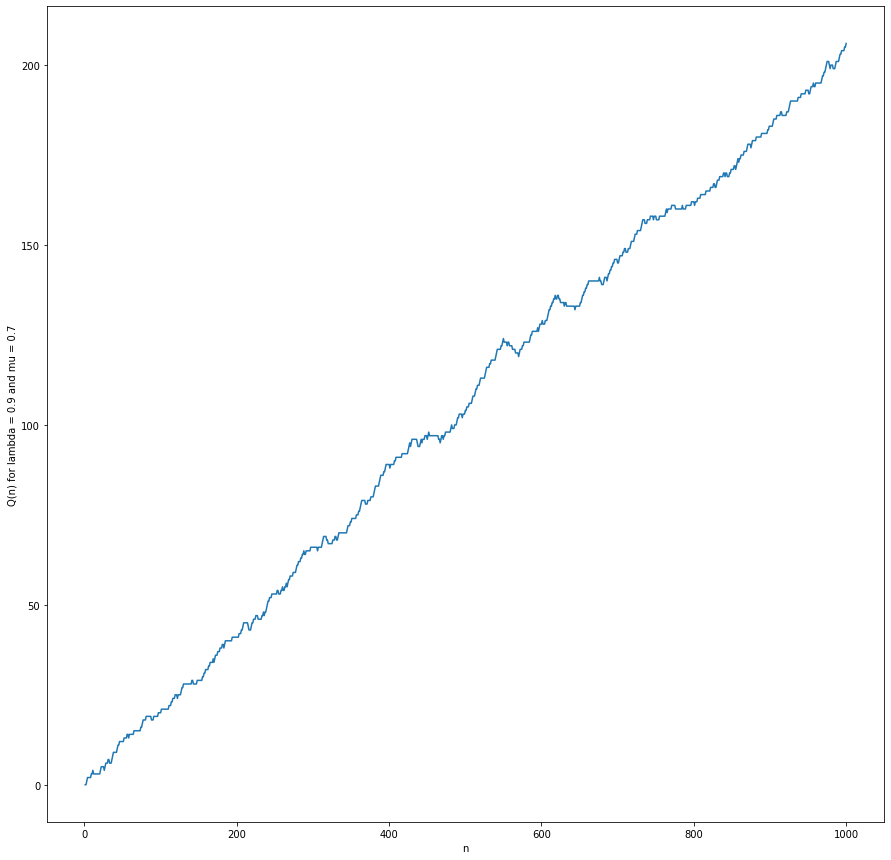

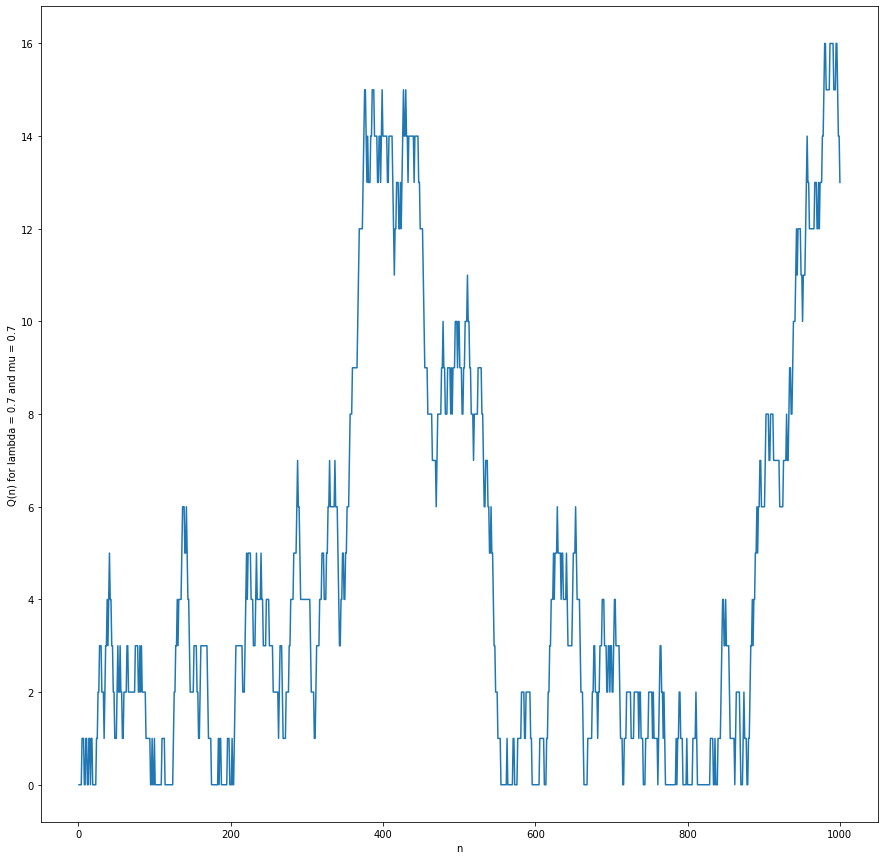

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15,15

def Q(n, p1, p2, p3):
    probs = [p1,p2,p3]
    k = np.random.choice([n+1,max(n-1,0),n], p=probs)
    return k


n = 0
mus = [0.9,0.7,0.7]
las = [0.7,0.9,0.7]

main_dict = {}

for i in range(len(mus)):
    mu=mus[i]
    la=las[i]
    value_matrix = []
    p1 = la*(1-mu)
    p2 = (1-la)*mu
    p3 = (1-mu)*(1-la) + la*mu
    for j in range(1000):
        values = [0]
        #changes = []
        n = 0
        for i in range(1000-1):
            n = Q(n,p1,p2,p3)
            #changes += [n]
            values += [n]

        value_matrix += [values]
        if(j==0):
            plt.plot(range(1,1001),values)
            plt.ylabel(f"Q(n) for lambda = {la} and mu = {mu}")
            plt.xlabel("n")
            plt.show()
    main_dict[(mu,la)] = value_matrix

In [2]:
for key in list(main_dict.keys()):
    val = main_dict[key]
    val = np.array(val)
    print(f'Ensemble Average for mu={key[0]} and lambda={key[1]}')
    en = np.average(val, axis=0)
    ta = np.average(val, axis=1)
    print("Mean of Ensemble Average =",np.mean(en))
    print("Std Deviation of Ensemble Average =",np.std(en))
    print(f'For the vector |Ensemble Average - Time Average|')
    print("Mean =",np.mean(np.abs(en-ta)))
    print("Std =",np.std(np.abs(en-ta)),'\n')

Ensemble Average for mu=0.9 and lambda=0.7
Mean of Ensemble Average = 0.34576300000000004
Std Deviation of Ensemble Average = 0.030469572215572702
For the vector |Ensemble Average - Time Average|
Mean = 0.069316
Std = 0.055980765839706056 

Ensemble Average for mu=0.7 and lambda=0.9
Mean of Ensemble Average = 100.85628899999999
Std Deviation of Ensemble Average = 57.956025602274345
For the vector |Ensemble Average - Time Average|
Mean = 50.163816
Std = 29.94227939957384 

Ensemble Average for mu=0.7 and lambda=0.7
Mean of Ensemble Average = 10.34195
Std Deviation of Ensemble Average = 3.668462105501432
For the vector |Ensemble Average - Time Average|
Mean = 5.681692
Std = 4.270209491715366 



In [3]:
r_holder = []
for key in main_dict.keys():
    val = main_dict[key]
    val = np.array(val)
    R = np.dot(val.T,val)/val.shape[0]
    print(val.shape)
    r_holder += [R]

(1000, 1000)
(1000, 1000)
(1000, 1000)


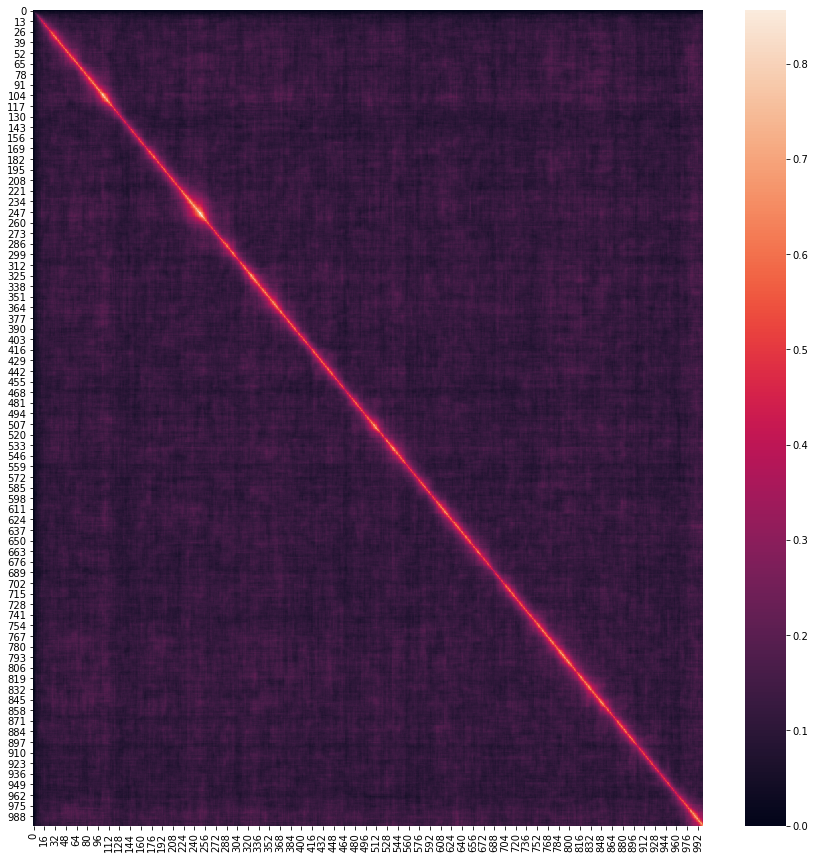

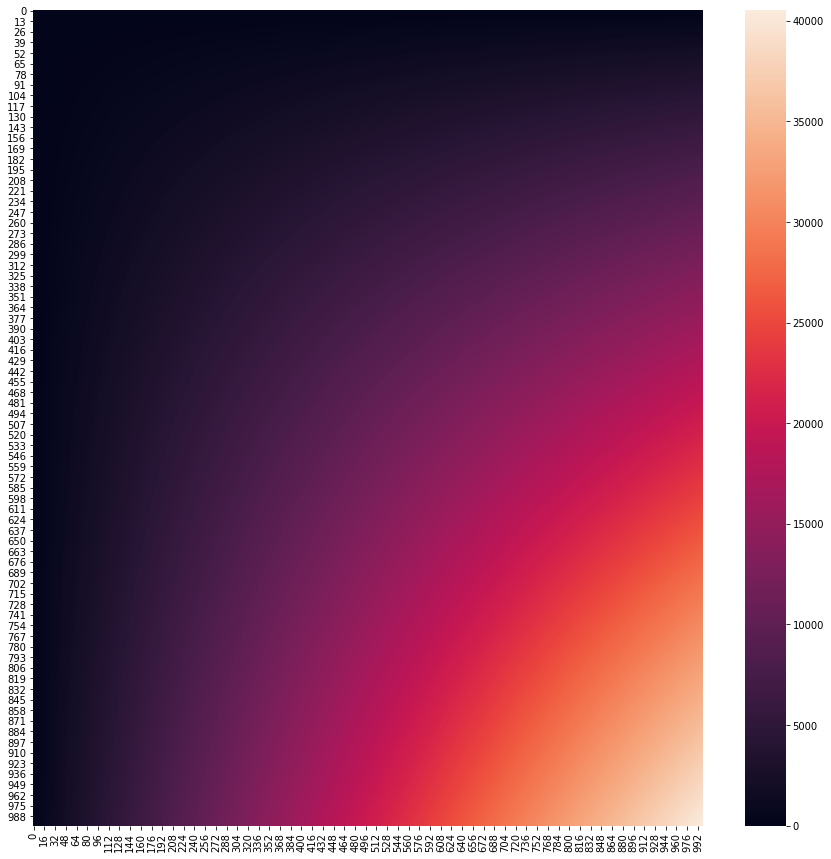

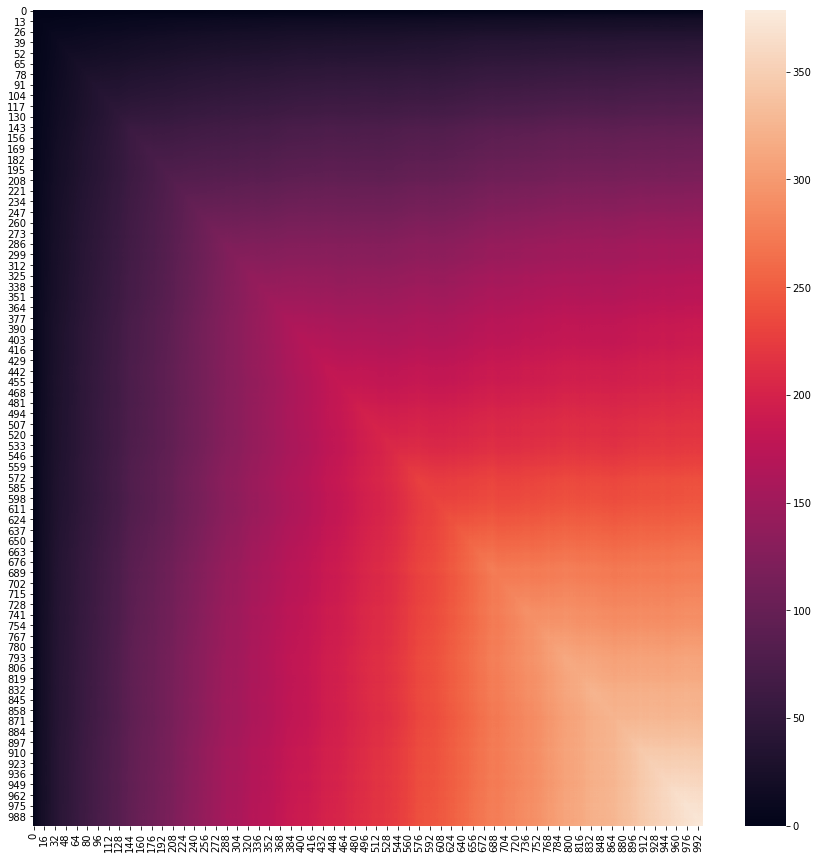

In [4]:
import seaborn as sns

for R in r_holder:
    sns.heatmap(R)
    plt.show()